<a href="https://colab.research.google.com/github/2yLee/AdvancedDataAnalyticsProfessionalStudy/blob/main/t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

cats_url = "https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cats.csv"

cats = pd.read_csv(cats_url)

cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [2]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


#일표본 t-test

H0 : 고양이의 평균 몸무게는 2.6이다.
유의수준 : 0.05

shapiro를 통해 데이터가 정규분포를 따르는지 확인, p-value가 유의수준보다 낮으므로 귀무가설(데이터가 정규성을 갖는다) 기각, 정규성을 가지지 않음

In [3]:
import scipy.stats as stats
from scipy.stats import shapiro

mu = 2.6
shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730228778906167e-05)

t-test 진행. p-value가 유의수준보다 낮으므로 귀무가설 기각

In [4]:
stats.wilcoxon(cats.Bwt - mu, alternative = 'two-sided') # 양측검정

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

Text(0, 0.5, 'Count')

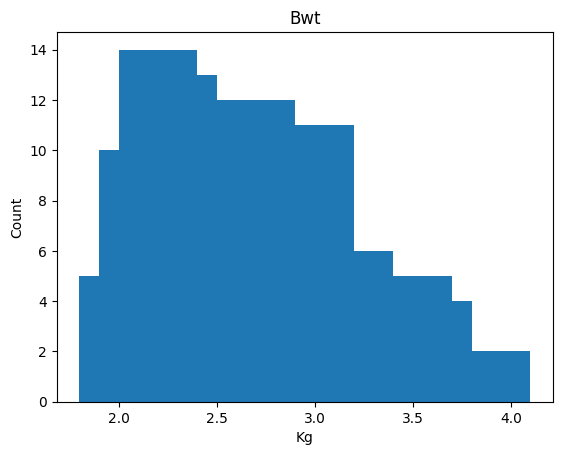

In [5]:
import matplotlib.pyplot as plt

cats_Bwt_cnt = pd.value_counts(cats['Bwt'].values, sort = False)
width = 0.4

plt.bar(cats_Bwt_cnt.index, cats_Bwt_cnt.values, width=width)
plt.title('Bwt')
plt.xlabel('Kg')
plt.ylabel('Count')

#대응표본 t-test(정규성 만족 가정)

10명의 환자 대상 수면영양제 복용 전과 후 수면시간 측정.

귀무가설: 영양제 효과 없다.(수면시간이 더 길어졌다.)

In [6]:
sleep = pd.DataFrame({'before' : [7,3,4,5,2,1,6,6,5,4], 'after':[8,4,5,6,2,3,6,8,6,5]})

sleep

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


복용 이후 수면 시간이 복용 이전 수면시간보다 더 길다는 것에 대한 t검정

p-value가 0.05보다 낮으므로 귀무가설 기각(영양제는 효과가 있다.)

In [7]:
stats.ttest_rel(sleep['after'], sleep['before'], alternative = 'greater')

TtestResult(statistic=4.743416490252569, pvalue=0.0005269356285082764, df=9)

In [8]:
sleep.mean()

before    4.3
after     5.3
dtype: float64

#독립표본 t-test(정규성, 등분산성 만족 가정)

정규성을 만족한다는 가정 하에 등분산성 검정

p-value가 0.05보다 작으므로 등분산성을 만족하지 않는다.

In [9]:
female = cats.loc[cats['Sex'] == 'F', 'Bwt']
male = cats.loc[cats['Sex'] == 'M', 'Bwt']

stats.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

등분산성이 만족하지 않으므로 equal_var = False로 독립표본 t-test 진행

귀무가설: 암컷 고양이와 수컷 고양이의 몸무게는 차이가 없다.

p-value가 0.05보다 작으므로 귀무가설 기각(몸무게 차이가 있다.)

In [10]:
stats.ttest_ind(female, male, equal_var = False)

TtestResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15, df=136.83788299625363)

In [11]:
print(female.mean())
print(male.mean())

2.359574468085107
2.8999999999999995


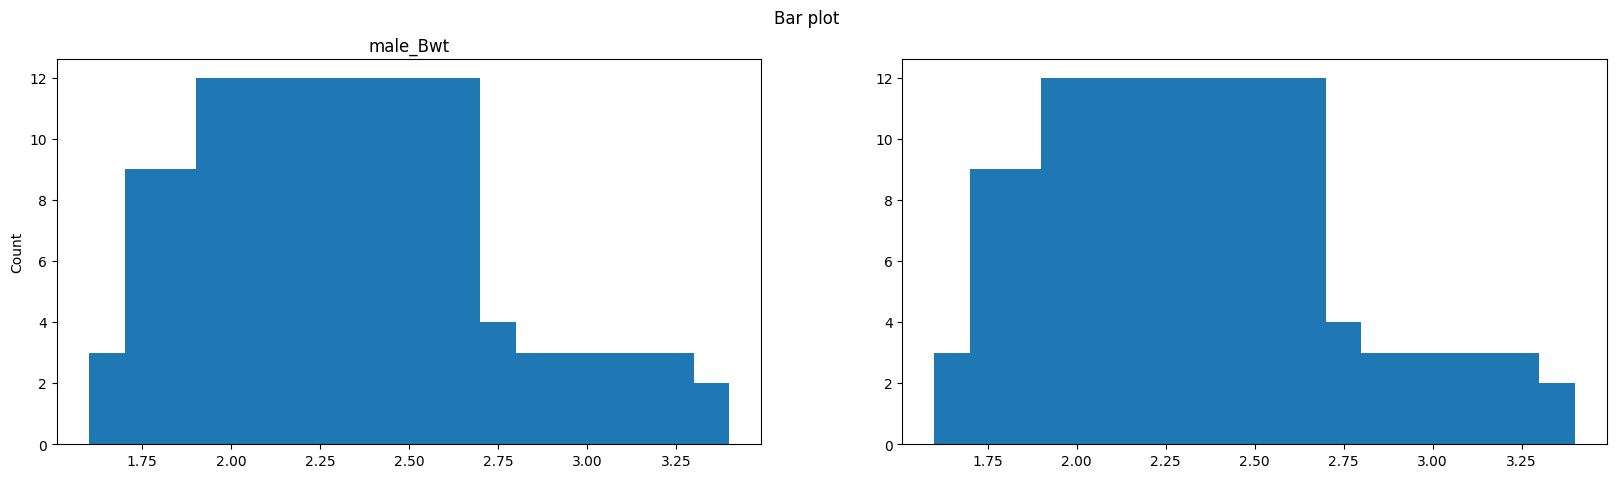

In [12]:
female_Bwt_cnt = pd.value_counts(female.values, sort = False)
male_Bwt_cnt = pd.value_counts(male.values, sort = False)

fig, axs = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle('Bar plot')
width = 0.4
axs[0].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('female_Bwt')
axs[0].set_ylabel('Count')
axs[1].bar(female_Bwt_cnt.index, female_Bwt_cnt.values)
axs[0].set_title('male_Bwt')
axs[0].set_ylabel('Count')
plt.show()